In [161]:
import pandas as pd

data = pd.read_csv('resources/digits/train.csv')

In [162]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [163]:
import matplotlib.pyplot as plt

#selecting all 1's
ones = data[data['label']==1]
ones = ones.iloc[:,1:].reset_index(drop=True)

In [164]:
import numpy as np

def getHandVProjections(gray_img):    
    #vertical projection
    r,c = gray_img.shape
    
    vertical_projection = []
    for index in range(c):
        vertical_projection.append(np.sum(gray_img[:,index]))
        
    #horizontal projection
    horizontal_projection = []
    for index in range(r):
        horizontal_projection.append(np.sum(gray_img[index,:]))

    return horizontal_projection, vertical_projection

In [165]:
import random

def plotProjections(numbers):
    #plot a random 10 samples
    plt.figure(figsize=(15,20))
    for i in range(1, 10):
        plt.subplot(10,3,(1 + 3*(i-1)))
        index = random.randrange(0, len(numbers))
        img = numbers.loc[index,:].values.reshape(28,28)
        plt.imshow(img, cmap="gray")

        h, v = getHandVProjections(img)

        plt.subplot(10,3,(2 + 3*(i-1)))
        plt.plot(h)

        plt.subplot(10,3,(3 + 3*(i-1)))
        plt.plot(v)

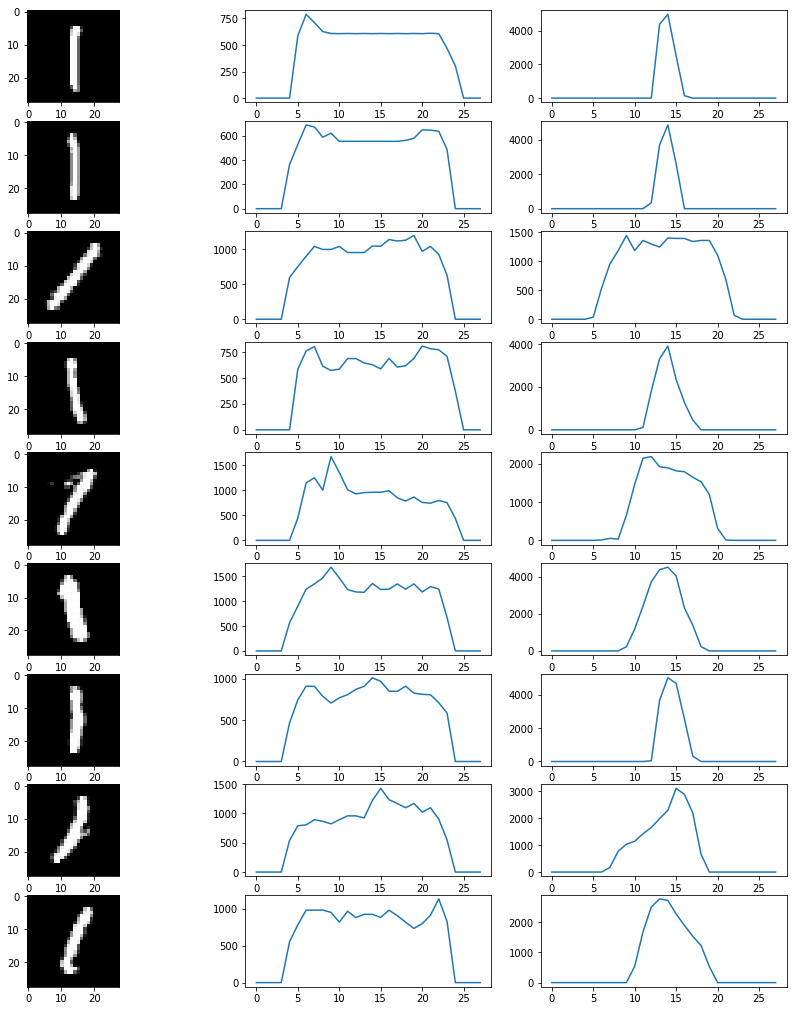

In [166]:
plotProjections(ones)

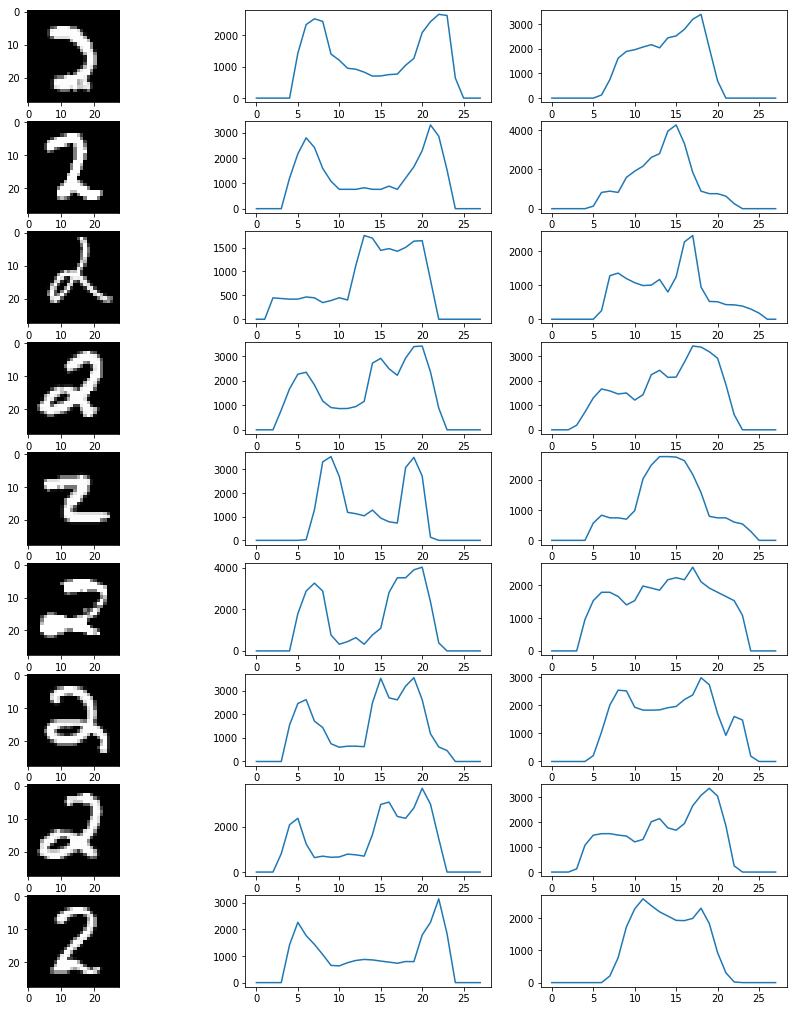

In [167]:
#selecting all 2's
twos = data[data['label']==2]
twos = twos.iloc[:,1:].reset_index(drop=True)
plotProjections(twos)

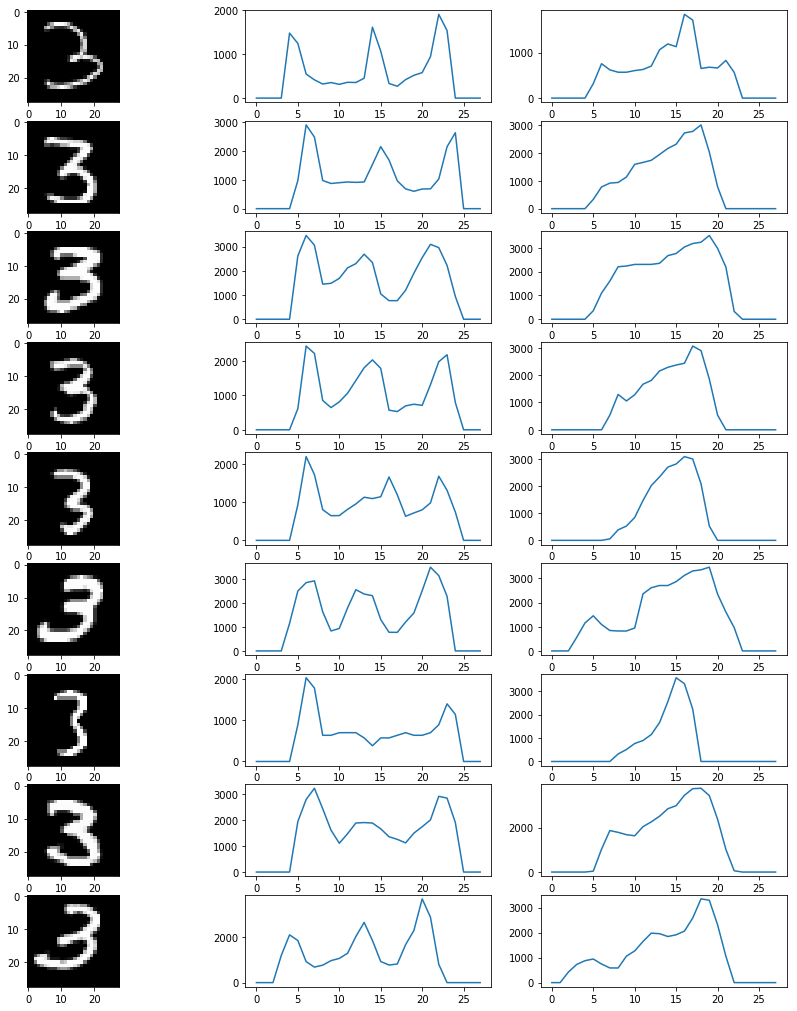

In [168]:
#selecting all 3's
threes = data[data['label']==3]
threes = threes.iloc[:,1:].reset_index(drop=True)
plotProjections(threes)

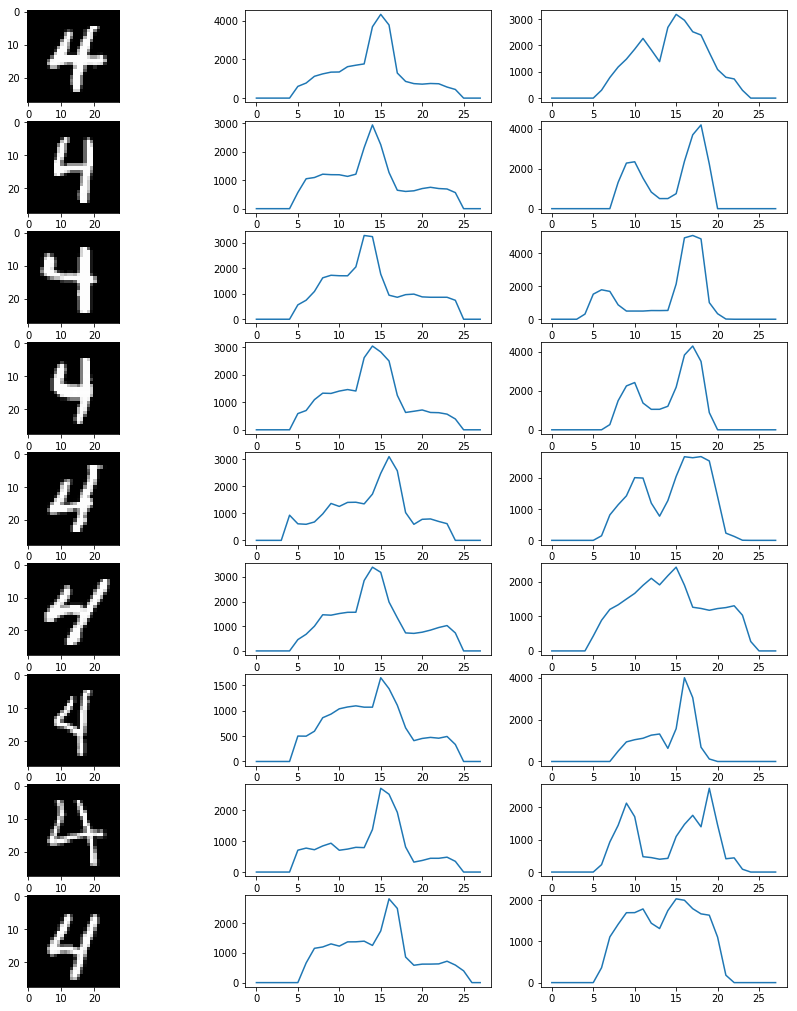

In [169]:
#selecting all 4's
fours = data[data['label']==4]
fours = fours.iloc[:,1:].reset_index(drop=True)
plotProjections(fours)

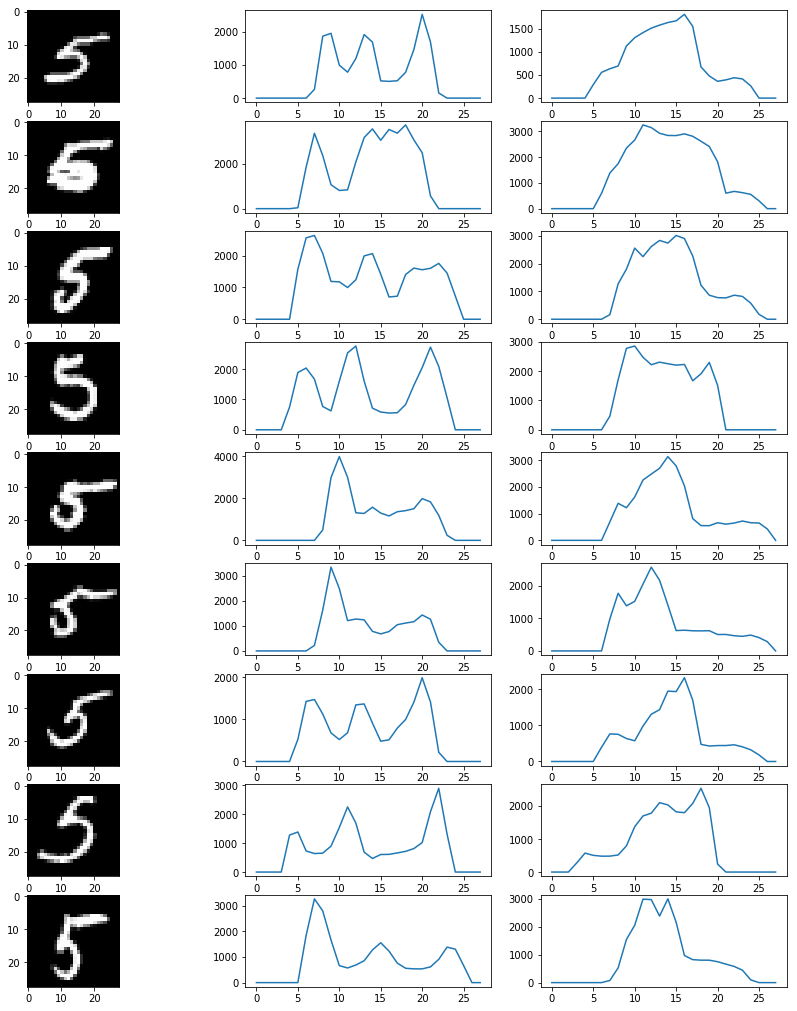

In [170]:
#selecting all 's
fives = data[data['label']==5]
fives = fives.iloc[:,1:].reset_index(drop=True)
plotProjections(fives)

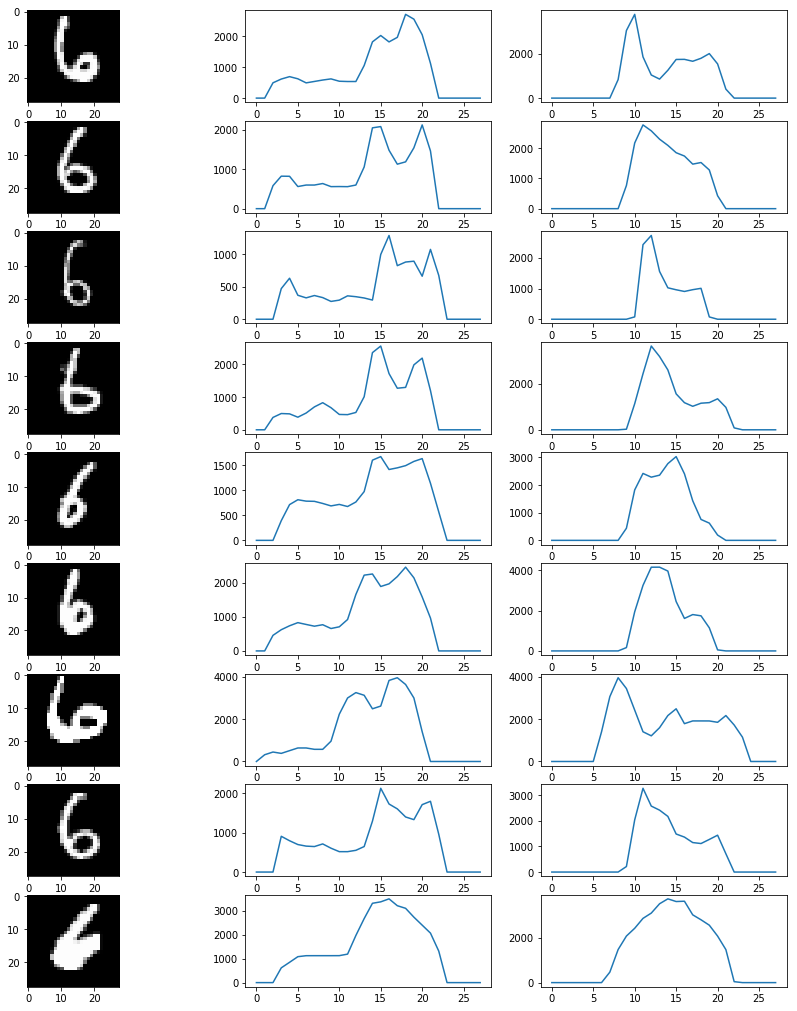

In [171]:
#selecting all 6's
sixes = data[data['label']==6]
sixes = sixes.iloc[:,1:].reset_index(drop=True)
plotProjections(sixes)

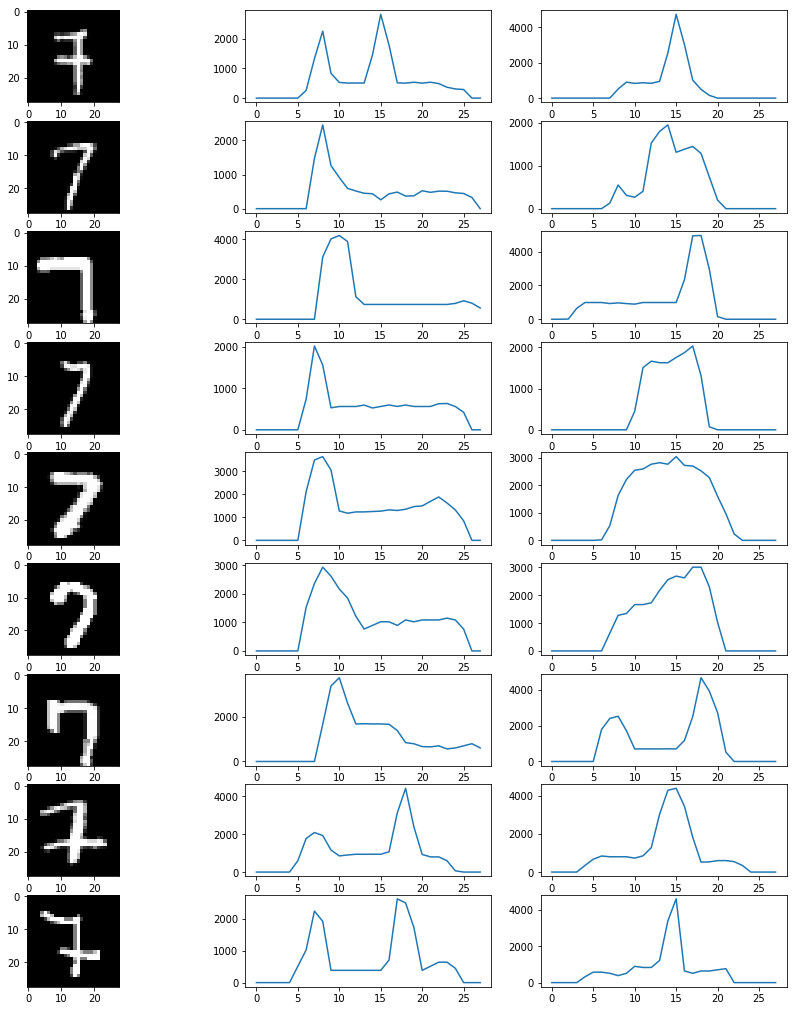

In [172]:
#selecting all 7's
sevens = data[data['label']==7]
sevens = sevens.iloc[:,1:].reset_index(drop=True)
plotProjections(sevens)

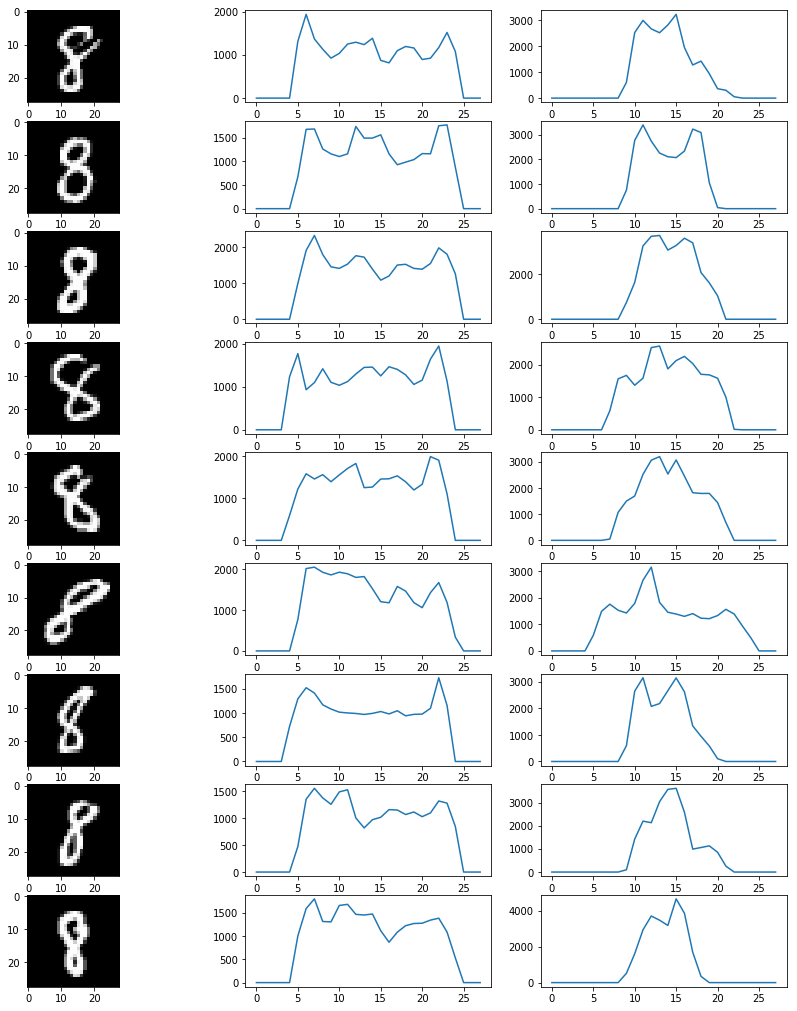

In [173]:
#selecting all 8's
eights = data[data['label']==8]
eights = eights.iloc[:,1:].reset_index(drop=True)
plotProjections(eights)

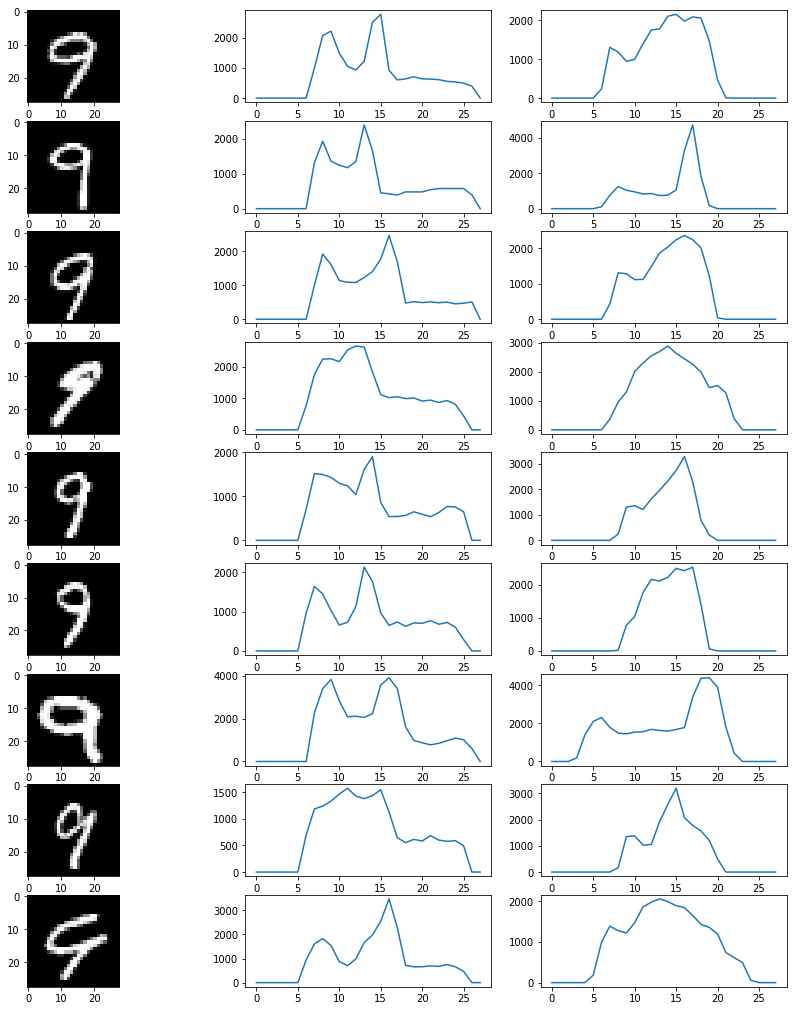

In [174]:
#selecting all 9's
nines = data[data['label']==9]
nines = nines.iloc[:,1:].reset_index(drop=True)
plotProjections(nines)

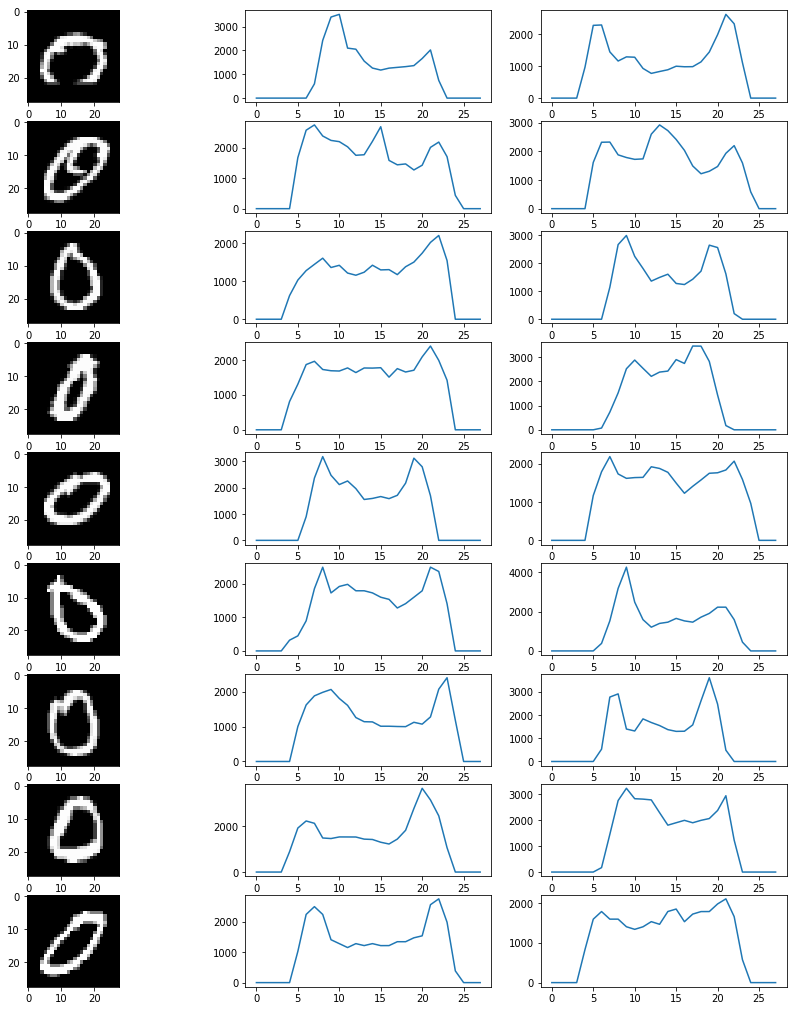

In [175]:
#selecting all 0's
zeros = data[data['label']==0]
zeros = zeros.iloc[:,1:].reset_index(drop=True)
plotProjections(zeros)

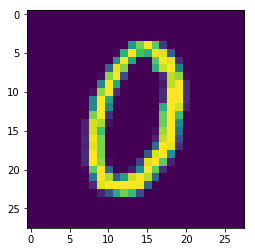

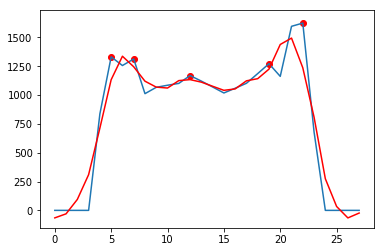

In [176]:
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

x = zeros.iloc[2,:].values
h,v = getHandVProjections(x.reshape(28,28))

plt.imshow(x.reshape(28,28))
peaks = signal.find_peaks(h)
ppoints = peaks[0]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(h)

arr = np.array(h)
xp = np.array(ppoints)
yp = arr[ppoints]

ax.scatter(xp,yp, color='r')

smoother_signal = savgol_filter(h,7, 2)
ax.plot(smoother_signal, color='red')

In [177]:
for index, row in zeros.iterrows():
    h,v = getHandVProjections(row.values.reshape(28,28))
    smoother_signal_h = savgol_filter(h,7, 2)
    smoother_signal_v = savgol_filter(v,7, 2)

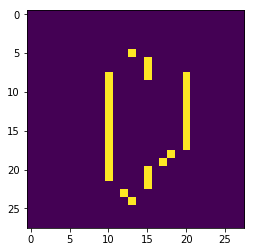

In [178]:
def getMinimalShape(number):
    peaks = signal.find_peaks(number)
    number_copy = np.copy(number)*0
    for p in peaks[0]:
        number_copy[p] = 255
    return number_copy

zero = zeros.loc[9,:].values
zero_copy = getMinimalShape(zero)
plt.imshow(zero_copy.reshape(28,28))

In [182]:
for index, row in data.iterrows():
    minimal = getMinimalShape(row[1:].values)
    row[1:] = minimal

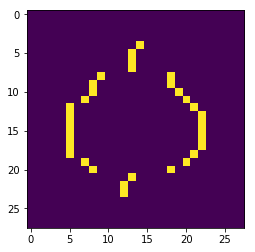

In [186]:
plt.imshow(data.iloc[4,1:].values.reshape(28,28))

In [187]:
Y = data['label']
X = data.drop(labels=["label"], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state=0, n_estimators=150)
etc.fit(X_train, Y_train)
print(etc.score(X_test, Y_test))

0.8652380952380953


In [188]:
ordata = pd.read_csv('resources/digits/train.csv')

Y = ordata['label']
X = ordata.drop(labels=["label"], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state=0, n_estimators=150)
etc.fit(X_train, Y_train)
print(etc.score(X_test, Y_test))

0.9661904761904762


In [210]:
new_data = []
for index, row in data.iterrows():
    arr = [row['label']]
    h,v = getHandVProjections(row[1:].values.reshape(28,28))
    hv = np.concatenate((h,v))
    arr = np.append(arr,hv)
    new_data.append(arr)

[   1    0    0    0    0  255  255  255  255  255  255  255  255  255
  255  255  255  255  255  255  255  255  255  255  255    0    0    0
    0    0    0    0    0    0    0    0    0    0 1020  510  255  510
  255    0 1020    0  255  255  255  255  510    0    0    0    0    0
    0]


In [221]:
dframe = pd.DataFrame(new_data)

KeyError: '0'

In [225]:
Y = dframe.iloc[:,0]
X = dframe.drop(0, axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state=0, n_estimators=150)
etc.fit(X_train, Y_train)
print(etc.score(X_test, Y_test))

0.8378571428571429
